# MNIST dataset and variants of MNIST dataset

In [1]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import os
import sys
root_path = os.path.dirname(os.getcwd())
sys.path.append(root_path)
print("root path:", root_path)
import numpy as np
import cv2
import torch
plt.ion() 

root path: /Users/shengdaolin_sh/dir_developer/workspaces/pycharm/acs-project-msc_project_ndp


In [2]:
def show_images(images,outputs, test_sample_indices):
    
    for i in range(0, len(test_sample_indices)):
        plt.figure()
        image = images[test_sample_indices[i]]
        y_r = outputs[test_sample_indices]
        H, W = image.shape
        plt.axis('off')
        plt.imshow(image, cmap='gray', extent=[0, H+1, W+1, 0])

        plt.figure()
        plt.imshow(image, cmap='gray', extent=[0, H+1, W+1, 0])
        plt.plot(y_r[i, :, 0].detach().cpu().numpy(),y_r[i, :, 1].detach().cpu().numpy(), c='b', linewidth=3)
        plt.axis('off')
        plt.show()

### Examples of Digits (0, 1, 2, 3, 4, 5, 6, 7, 8, 9) 

In [3]:
digit_str = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'all']
test_samples = [[490, 740, 1100, 1330, 1800, 2700],
                [461, 521, 901, 1001, 1101, 1431, 2061, 2141],
                [322, 422, 1532, 1762, 1882, 2102, 2142, 2382, 2732],
                [333, 1023, 1623, 2823, 2963],
                [214, 284, 894, 954, 1244, 1254, 1754, 1954],
                [295, 1715, 1795, 2075, 2265],
                [146, 166, 456, 546, 746, 1016, 1276, 1956, 1976, 2646],
                [157, 487, 547, 577, 737, 727, 977, 1147, 2327, 1577, 1687],
                [988, 1418, 1678, 1818, 2578, 2648],
                [1629, 1969, 1999, 2019],
                [490, 901, 2732, 1623, 214, 1715, 1976, 977, 988, 1629]
               ]

## Load Different Types Datasets

### 1, s-MNIST dataset

In [4]:
from imednet.imednet.data.smnist_loader import MatLoader, Mapping
data_path = os.path.join(root_path, 'imednet/data/s-mnist/40x40-smnist.mat')
data_stub = 'smnist'
images, outputs, scale, or_tr = MatLoader.load_data(data_path,load_original_trajectories=True)

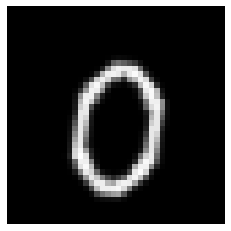

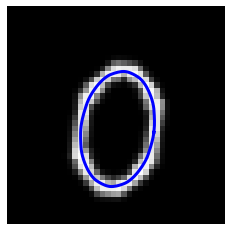

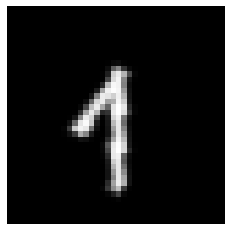

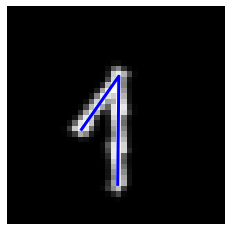

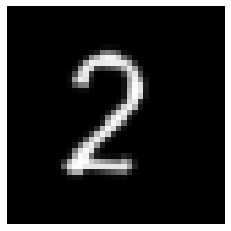

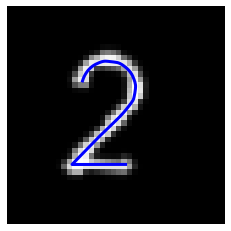

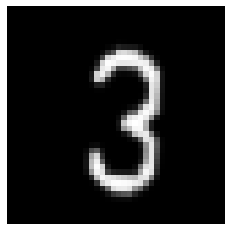

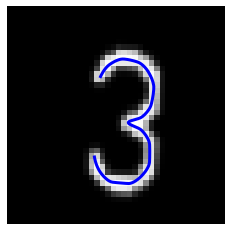

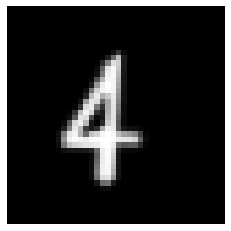

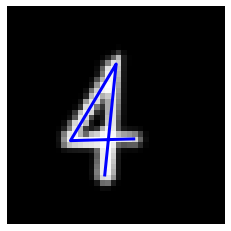

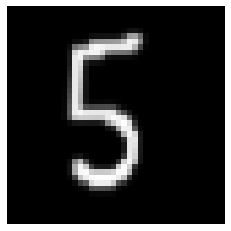

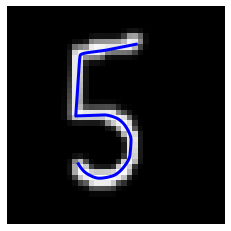

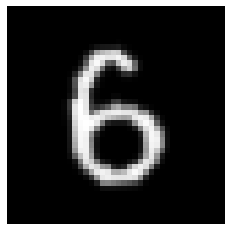

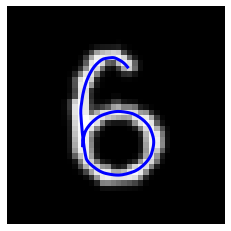

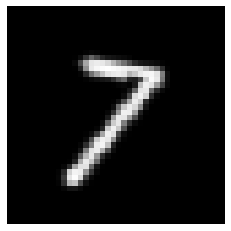

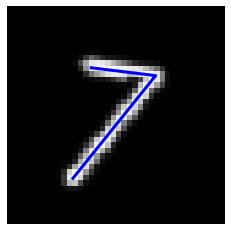

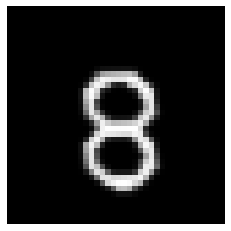

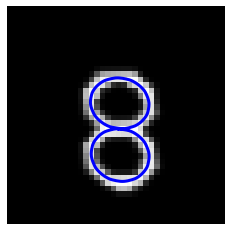

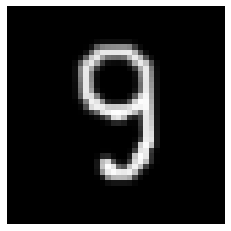

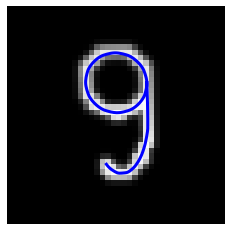

In [5]:
Y_test = torch.Tensor(np.array(or_tr)[:, :, :2]).float()
show_images(images,Y_test, test_samples[10])

### 2, s-MNIST-AWGN dataset

#### Synthetic MNIST with Additive White Gaussian Noise (AWGN with 9.5)
The AWGN dataset is created using an Additive White Gaussian Noise with signal-to-noise ratio of 9.5. This emulates significant background clutter.

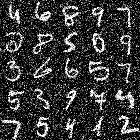
n-MNIST with Additive White Gaussian Noise (AWGN)

In [6]:
from imednet.imednet.data.smnist_loader import MatLoader, Mapping
data_path = os.path.join(root_path, 'imednet/data/s-mnist/40x40-smnist-with-awgn.mat')
data_stub = 'smnist_awgn_9_5_snr'
images, outputs, scale, or_tr = MatLoader.load_data(data_path,load_original_trajectories=True)

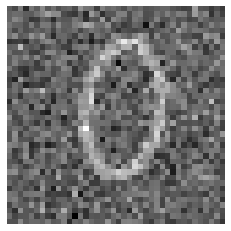

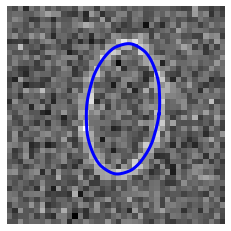

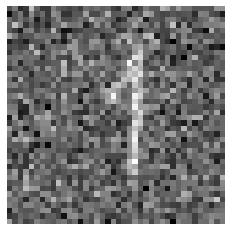

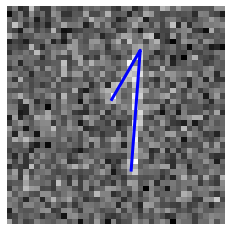

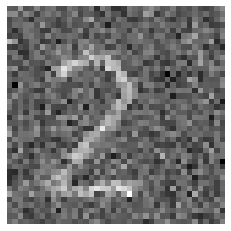

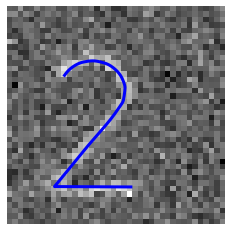

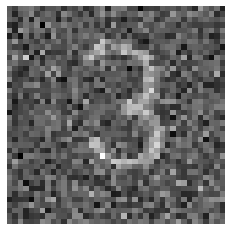

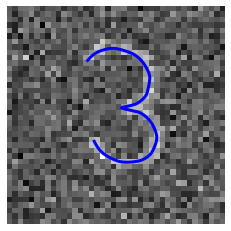

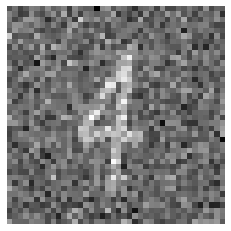

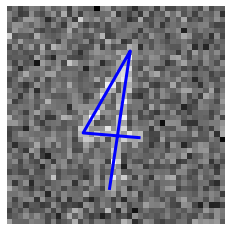

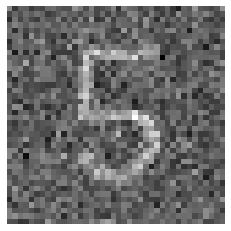

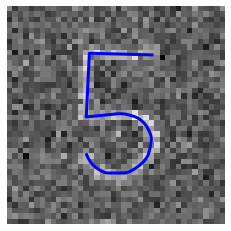

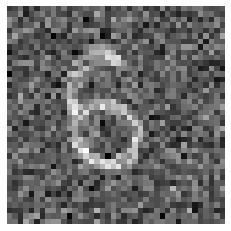

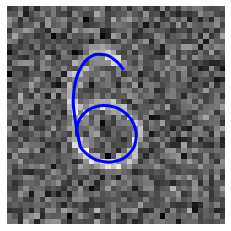

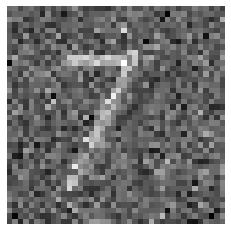

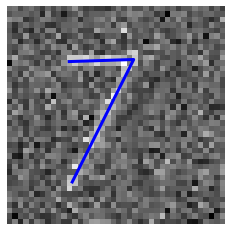

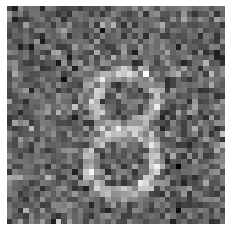

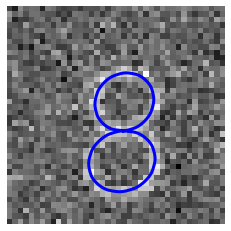

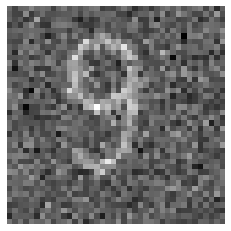

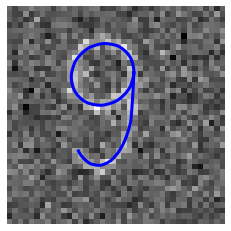

In [7]:
Y_test = torch.Tensor(np.array(or_tr)[:, :, :2]).float()
show_images(images,Y_test, test_samples[10])

### 3, s-MNIST-MB dataset

####  Synthetic MNIST with Motion Blur
The Motion Blur filter emulates a linear motion of a camera by τ pixels, with an angle of θ degrees. The filter becomes a vector for horizontal and vertical motions. We use a τ value of 5 pixels and θ value of 15 degrees in the counterclockwise direction.

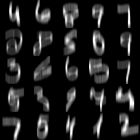
n-MNIST with Motion Blur

In [8]:
from imednet.imednet.data.smnist_loader import MatLoader, Mapping
data_path = os.path.join(root_path, 'imednet/data/s-mnist/40x40-smnist-with-motion-blur.mat')
data_stub = 'smnist_mb'
images, outputs, scale, or_tr = MatLoader.load_data(data_path,load_original_trajectories=True)

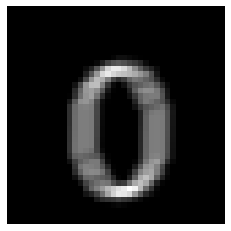

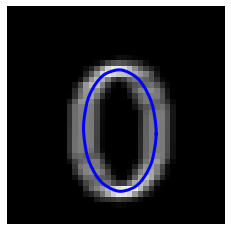

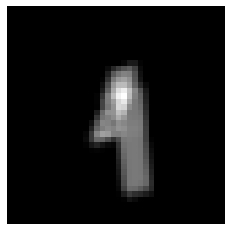

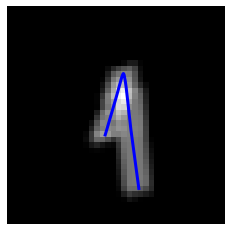

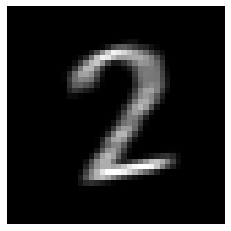

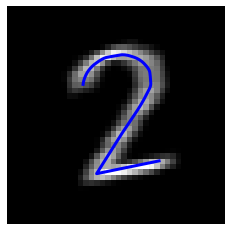

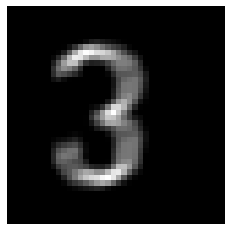

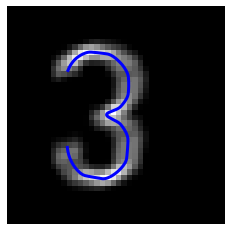

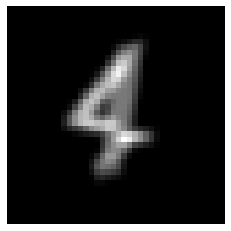

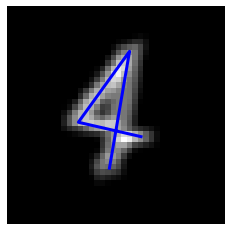

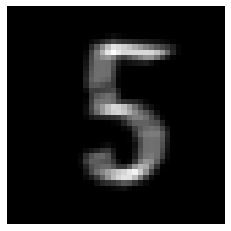

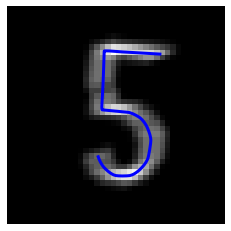

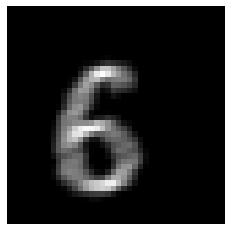

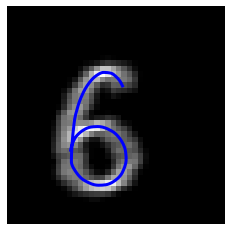

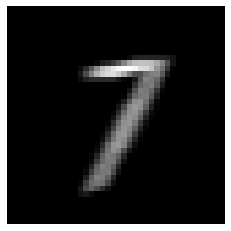

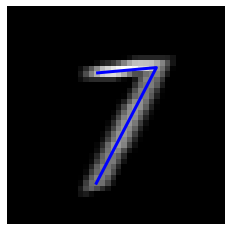

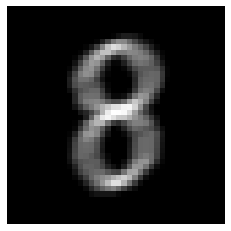

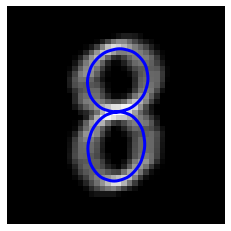

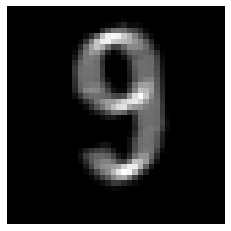

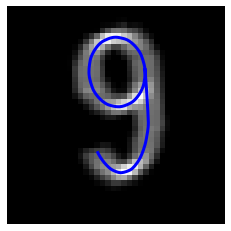

In [9]:
Y_test = torch.Tensor(np.array(or_tr)[:, :, :2]).float()
show_images(images,Y_test, test_samples[10])

### 4, s-MNIST-RC-AWGN dataset

#### Synthetic MNIST with Reduced Contrast and AWGN
The contrast range was scaled down to half and was applied with an Additive White Gaussian Noise with signal-to-noise ratio of 19. This emulates background clutter along with significant change in lighting conditions.

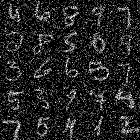
n-MNIST with reduced contrast and AWGN

In [10]:
from imednet.imednet.data.smnist_loader import MatLoader, Mapping
data_path = os.path.join(root_path, 'imednet/data/s-mnist/40x40-smnist-with-reduced-contrast-and-awgn.mat')
data_stub = 'smnist_rc_awgn'
images, outputs, scale, or_tr = MatLoader.load_data(data_path,load_original_trajectories=True)

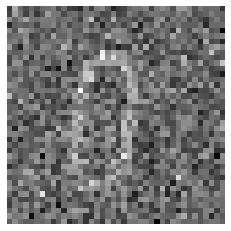

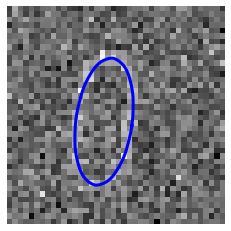

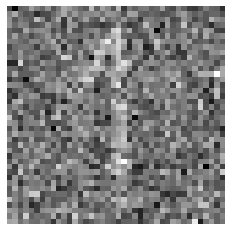

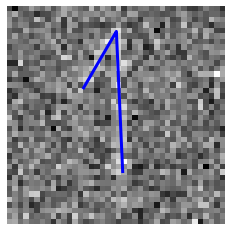

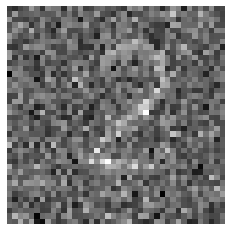

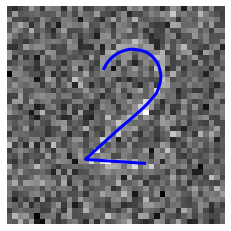

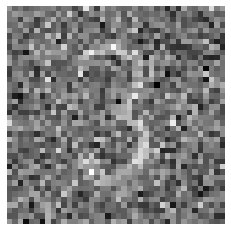

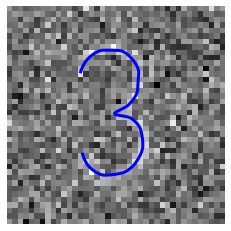

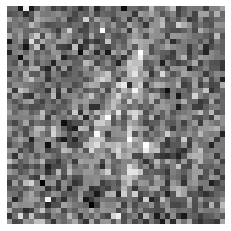

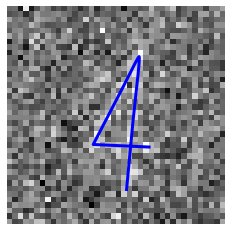

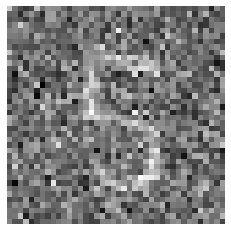

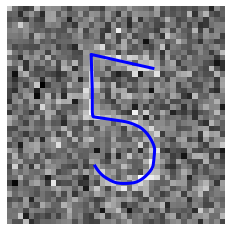

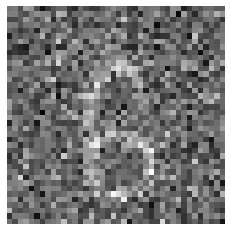

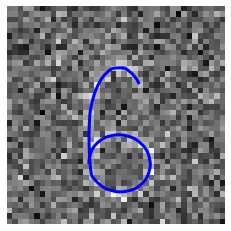

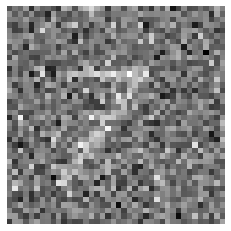

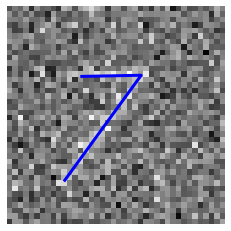

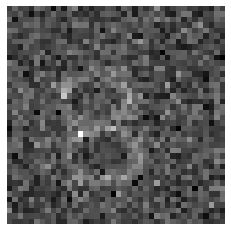

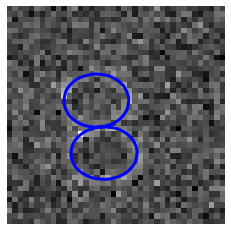

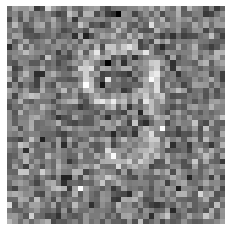

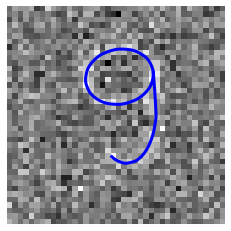

In [11]:
Y_test = torch.Tensor(np.array(or_tr)[:, :, :2]).float()
show_images(images,Y_test, test_samples[10])

### 5, m-MNIST dataset

In [12]:
import os
import numpy as np
import cv2

In [13]:
def load_images(file_path):
    images = []
    for file in os.listdir(file_path):
        if os.path.isfile(os.path.join(file_path, file)) == True:
            c= os.path.basename(file)
            name = file_path + '\\' + c
            img = cv2.imread(name)
            images.append(img)

In [14]:
file_path = root_path + '/imednet/data/m-mnist/double_mnist_seed_123_image_size_64_64/test/02'
print(file_path)
images = load_images(file_path)
images = np.array(images)
images.shape

/Users/shengdaolin_sh/dir_developer/workspaces/pycharm/acs-project-msc_project_ndp/imednet/data/m-mnist/double_mnist_seed_123_image_size_64_64/test/02


()

In [15]:
image = cv2.imread(file_path+'/0_02.png')
print(image.shape)

(64, 64, 3)


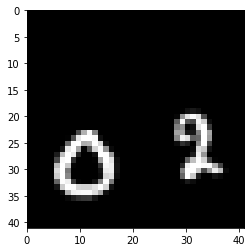

In [16]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread(file_path+'/0_02.png')
img = cv2.resize(img,(40,40))
H, W = img.shape
plt.imshow(img, cmap='gray', extent=[0, H+1, W+1, 0])

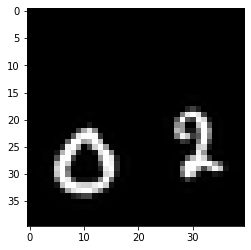

In [17]:
from PIL import Image
img = Image.open(file_path+'/0_02.png')
img.thumbnail((40, 40), Image.ANTIALIAS)
plt.imshow(img, cmap='gray')
plt.axis('on')
plt.show()

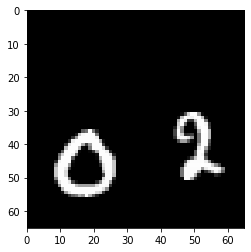

In [18]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
H, W, C = image.shape
plt.imshow(image, cmap='gray', extent=[0, H+1, W+1, 0])
plt.axis('on')
plt.show()

### 6, EMNIST dataset

In [19]:
from emnist import list_datasets

In [20]:
list_datasets()

['balanced', 'byclass', 'bymerge', 'digits', 'letters', 'mnist']

In [21]:
from emnist import extract_training_samples
from emnist import extract_test_samples
images, labels = extract_training_samples('letters')
print(images.shape)
print(labels.shape)
images, labels = extract_test_samples('letters')
print(images.shape)
print(labels.shape)

(124800, 28, 28)
(124800,)
(20800, 28, 28)
(20800,)


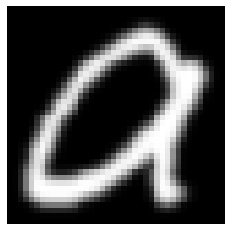

In [22]:
import matplotlib
import matplotlib.pyplot as plt
import cv2
import numpy as np
%matplotlib inline
plt.figure()
image = images[3]
image=cv2.resize(image,(40,40))
H, W = image.shape
plt.imshow(image, cmap='gray', extent=[0, H+1, W+1, 0])
plt.axis('off')
plt.show()

In [23]:
def plot_images(image):
    plt.figure()
    image=cv2.resize(image,(40,40))
    H, W = image.shape
    plt.imshow(image, cmap='gray', extent=[0, H+1, W+1, 0])
    plt.axis('off')
    plt.show()

[ 7667 12841 14802 10524 14927 12301 12692 10336 18484   249  5788  8555
 15682 18396  1750 16623 16924 17713  8800 13200]
====== 7667


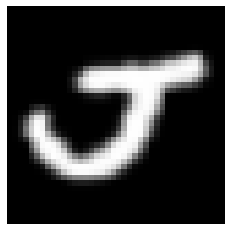

====== 12841


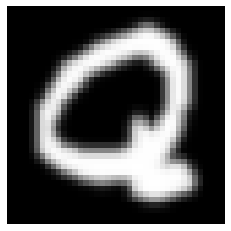

====== 14802


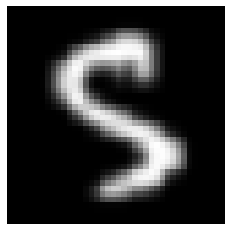

====== 10524


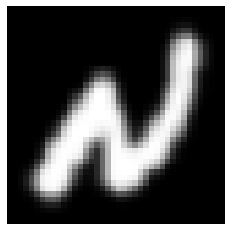

====== 14927


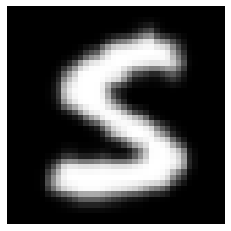

====== 12301


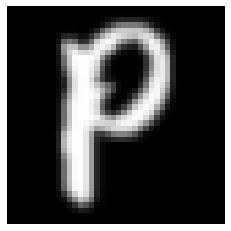

====== 12692


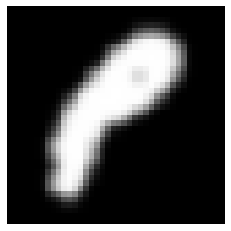

====== 10336


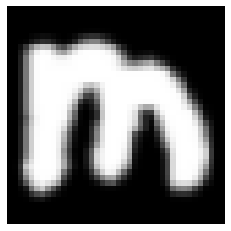

====== 18484


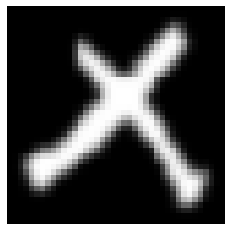

====== 249


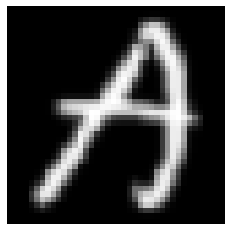

====== 5788


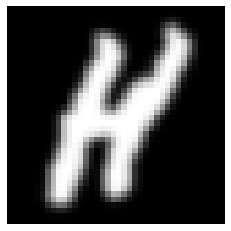

====== 8555


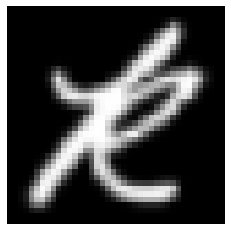

====== 15682


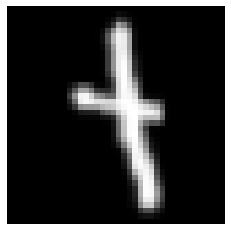

====== 18396


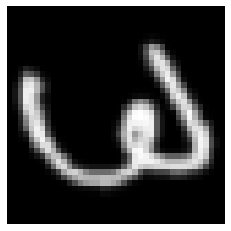

====== 1750


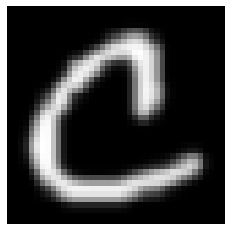

====== 16623


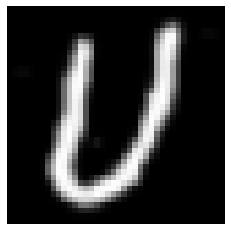

====== 16924


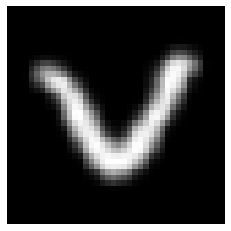

====== 17713


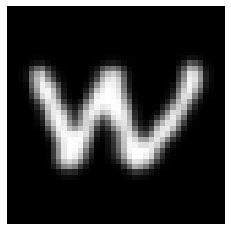

====== 8800


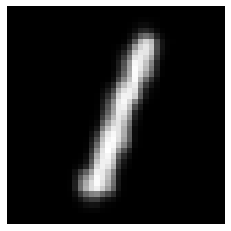

====== 13200


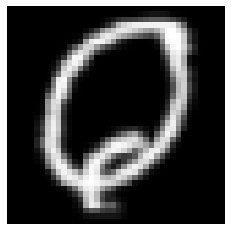

In [24]:
inds = np.arange(20800)
np.random.shuffle(inds)
test_inds = inds[:20]
print(test_inds)
for i in test_inds:
    image = images[i]
    print('======', i)
    plot_images(image)

### 7, MNIST dataset

In [25]:
import torch
import torchvision
import torchvision.datasets as datasets

In [26]:
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)

/Users/shengdaolin_sh/dir_install/Aanconda3/anaconda3/envs/env_msc_project_py38/lib/python3.8/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [27]:
len(mnist_trainset)

60000

In [28]:
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('./data', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=64, shuffle=True)

In [29]:
images, labels = next(iter(train_loader))

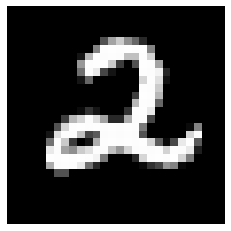

In [30]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.axis('off')
for i in range(0, 20):
    plt.imshow(images[32].reshape(28,28), cmap="gray")